<a href="https://colab.research.google.com/github/Palak1340/Bike_Sharing_Demand_Prediction/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [9]:
# Load Dataset
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trades_df = pd.read_csv("/content/historical_data.csv")

In [10]:
sentiment_df


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [11]:
trades_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [12]:
# Preprocessing sentiment
from datetime import datetime
sentiment_df['date']=pd.to_datetime(sentiment_df['date'],format='%Y-%m-%d')
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [13]:
sentiment_df.rename(columns={'classification': 'sentiment'}, inplace=True)
sentiment_df

,timestamp,value,sentiment,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [14]:
trades_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [15]:
# Preprocessing Trades
# convert trade_date timestamps to datetime
trades_df["trade_date"] = pd.to_datetime(trades_df["Timestamp IST"], errors="coerce", dayfirst=True)




In [16]:
trades_df["trade_date"] = trades_df["trade_date"].dt.date


In [17]:
print(trades_df["trade_date"].head())


0    2024-12-02
1    2024-12-02
2    2024-12-02
3    2024-12-02
4    2024-12-02
Name: trade_date, dtype: object


In [18]:
trades_df['trade_date'] = pd.to_datetime(trades_df['trade_date'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')



In [19]:
# Merge on date
merged_df= trades_df.merge(sentiment_df[['date','sentiment','value']],left_on= 'trade_date', right_on= 'date', how='left')

In [20]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,sentiment,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,2025-04-25,Greed,60.0
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,2025-04-25,Greed,60.0
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,2025-04-25,Greed,60.0
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,2025-04-25,Greed,60.0


In [21]:
merged_df.shape

(211224, 20)

In [35]:
# Aggregation : Performance by sentiment

performance_summary = (merged_df.groupby('sentiment').agg(total_trades=('Closed PnL','count'),avg_pnl=('Closed PnL','mean'),
                                                          median_pnl=('Closed PnL','median'),total_pnl=('Closed PnL','sum'),
                                                          avg_fee=('Fee','mean')).reset_index().sort_values('avg_pnl',ascending=False))

In [44]:
# Save and View
performance_summary.to_csv("trader_performance_by_sentiment.csv", index=False)

print("===Trader Performance by Market Sentiment ===")
print(performance_summary)

===Trader Performance by Market Sentiment ===
       sentiment  total_trades    avg_pnl  median_pnl     total_pnl   avg_fee
1  Extreme Greed         39992  67.892861         0.0  2.715171e+06  0.675902
2           Fear         61837  54.290400         0.0  3.357155e+06  1.495172
3          Greed         50303  42.743559         0.0  2.150129e+06  1.254372
0   Extreme Fear         21400  34.537862         0.0  7.391102e+05  1.116291
4        Neutral         37686  34.307718         0.0  1.292921e+06  1.044798


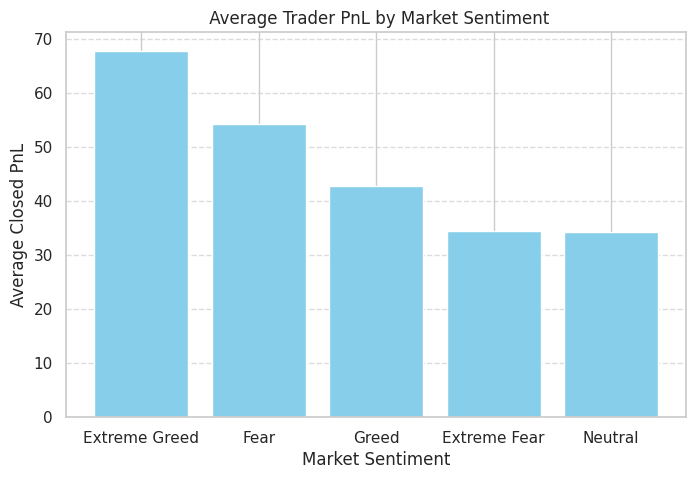

In [72]:
# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(performance_summary['sentiment'],performance_summary['avg_pnl'],color='skyblue')
plt.title(" Average Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()



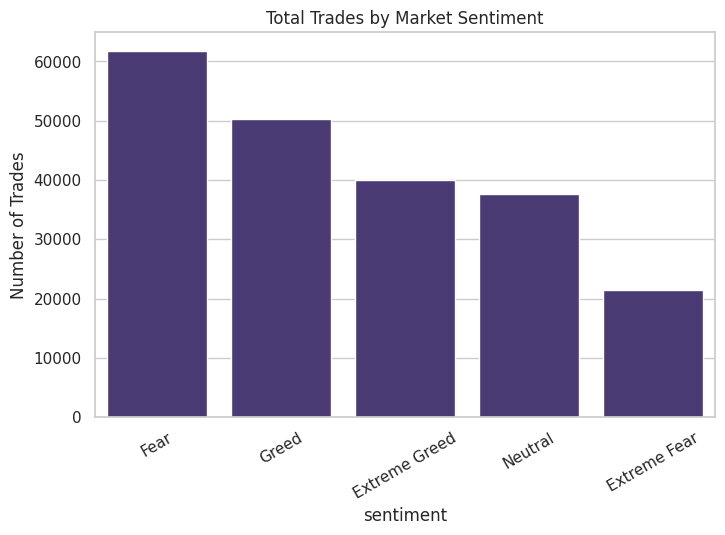

In [47]:
#2. Total Trades by Market Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=performance_summary, x="sentiment", y="total_trades", order=performance_summary.sort_values("total_trades", ascending=False)["sentiment"])
plt.title("Total Trades by Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=30)
plt.show()

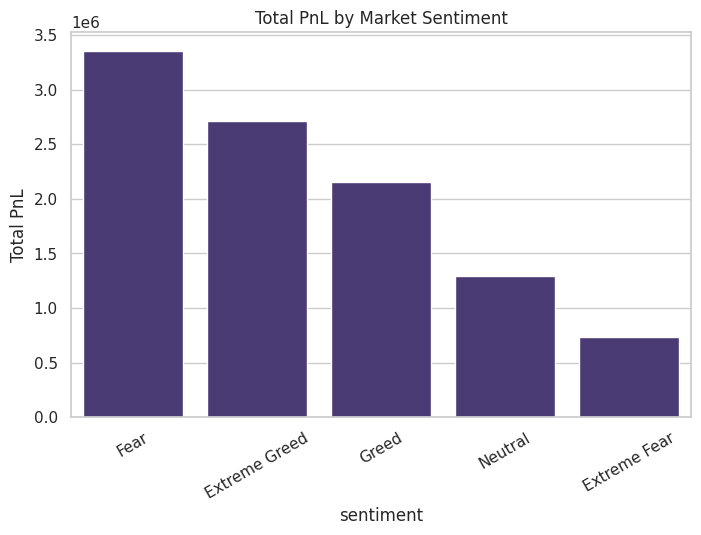

In [49]:
#3. Total PnL by Market Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=performance_summary, x="sentiment", y="total_pnl", order=performance_summary.sort_values("total_pnl", ascending=False)["sentiment"])
plt.title("Total PnL by Market Sentiment")
plt.ylabel("Total PnL")
plt.xticks(rotation=30)
plt.show()

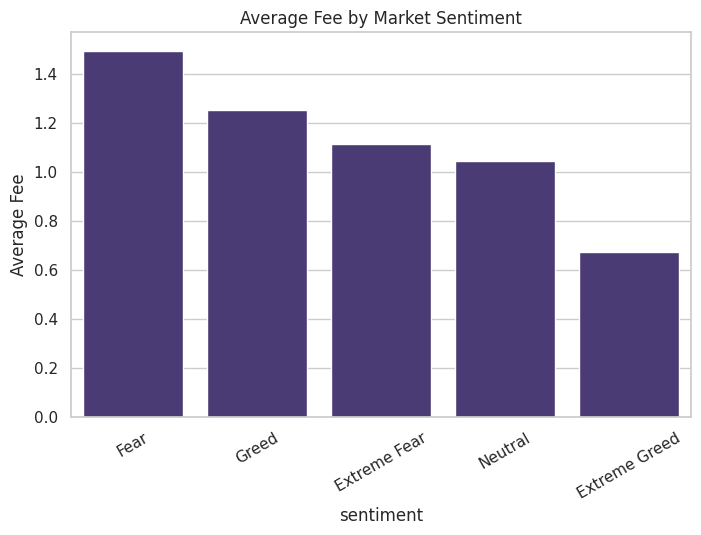

In [45]:
# 4. Average Fee by Market Sentiment

import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=performance_summary, x="sentiment", y="avg_fee", order=performance_summary.sort_values("avg_fee", ascending=False)["sentiment"])
plt.title("Average Fee by Market Sentiment")
plt.ylabel("Average Fee")
plt.xticks(rotation=30)
plt.show()

**Summary**


---





**1.Trade Volume & Market Sentiment Highest trades:** Fear (61,837 trades)

Lowest trades: Extreme Fear (21,400 trades)

This suggests traders are more active during fear and greed phases, but least active during extreme fear.

**2.Profitability Trends**

Highest Avg PnL: Extreme Greed (≈ ₹67.89 per trade)

Lowest Avg PnL: Neutral (≈ ₹34.31 per trade)

Extreme greed seems to bring in higher profits per trade, likely due to strong upward momentum.

**3.Total PnL**

Top Total PnL: Fear (~ ₹3.35M)

Despite having lower avg PnL than extreme greed, fear had more trades, which boosted total profit.

Lowest Total PnL: Extreme Fear (~ ₹0.74M), indicating market downturns impact both trade volume and profit.



**4. Fees Impact**

Highest Fees: Fear (₹1.49 avg fee per trade) — high trading activity drives costs up.

Lowest Fees: Extreme Greed (~ ₹0.68) — possibly fewer but more targeted trades.



---



**Key Insights:**

Traders thrive the most in Extreme Greed in terms of profit per trade.

Fear periods see highest overall profits due to high trading volume.

Extreme Fear is the worst for both profit and volume.

Neutral sentiment yields low profitability, meaning traders might just be "waiting" during indecisive markets.

In [106]:
import os

# Candidate name
candidate_name = "Palak"

# Root directory
root_dir = f"ds_{candidate_name}"

# Sub-directories
dirs = [
    root_dir,
    f"{root_dir}/csv_files",
    f"{root_dir}/outputs"
]

# Create directories
for d in dirs:
    os.makedirs(d, exist_ok=True)

# Create placeholder files
open(f"{root_dir}/notebook_1.ipynb", "w").write("# Notebook_1\n")
open(f"{root_dir}/README.md", "w").write(f"# Data Science Project - {candidate_name}\n\nKey Insights: Traders thrive the most in Extreme Greed in terms of profit per trade. Fear periods see highest overall profits due to high trading volume. Extreme Fear is the worst for both profit and volume.Neutral sentiment yields low profitability, meaning traders might just be 'waiting' during indecisive markets.\n")
open(f"{root_dir}/ds_report.pdf", "wb").close()  # Empty placeholder PDF

print(f"Directory structure for {root_dir} created successfully ✅")


Directory structure for ds_Palak created successfully ✅


In [108]:
import shutil
shutil.move("/content/notebook_1.ipynb", f"{root_dir}/notebook_1.ipynb")

'ds_Palak/notebook_1.ipynb'

In [103]:
performance_summary.to_csv("ds_Palak/csv_files/processed_data.csv", index=False)


In [104]:
# Create the 'outputs' folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)


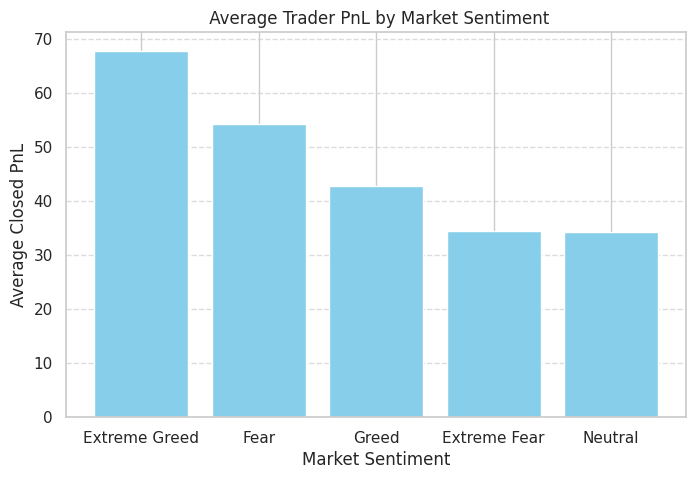

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(performance_summary['sentiment'],performance_summary['avg_pnl'],color='skyblue')
plt.title(" Average Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.grid(axis='y', linestyle='--',alpha=0.7)

plt.savefig("outputs/avg_trader_pnl_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


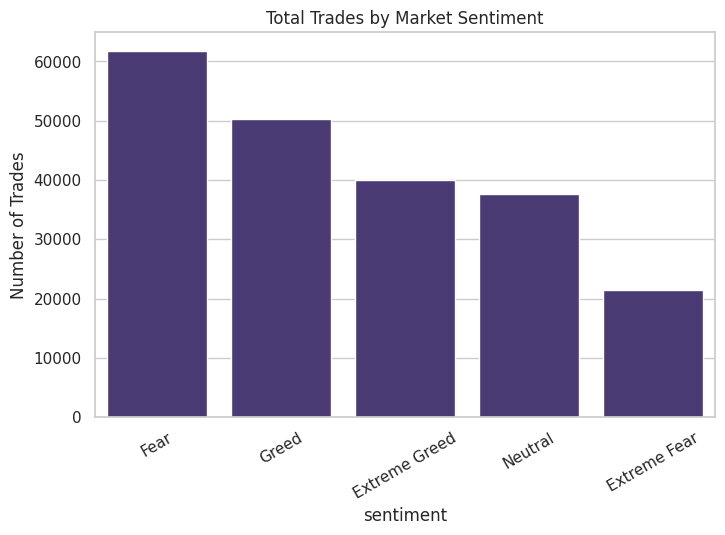

In [87]:
#2. Total Trades by Market Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=performance_summary, x="sentiment", y="total_trades", order=performance_summary.sort_values("total_trades", ascending=False)["sentiment"])
plt.title("Total Trades by Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=30)
plt.savefig("outputs/Total Trades by Market Sentiment.png", dpi=300, bbox_inches='tight')


plt.show()

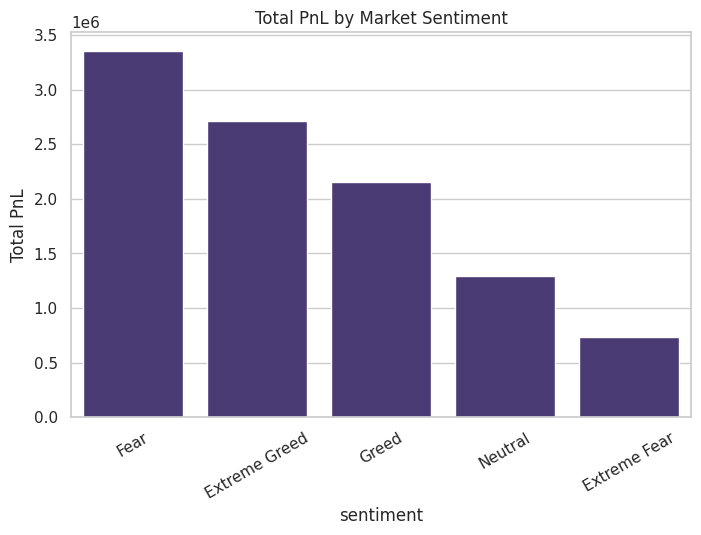

In [88]:
#3. Total PnL by Market Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=performance_summary, x="sentiment", y="total_pnl", order=performance_summary.sort_values("total_pnl", ascending=False)["sentiment"])
plt.title("Total PnL by Market Sentiment")
plt.ylabel("Total PnL")
plt.xticks(rotation=30)
plt.savefig("outputs/Total PnL by Market Sentiment.png", dpi=300, bbox_inches='tight')

plt.show()

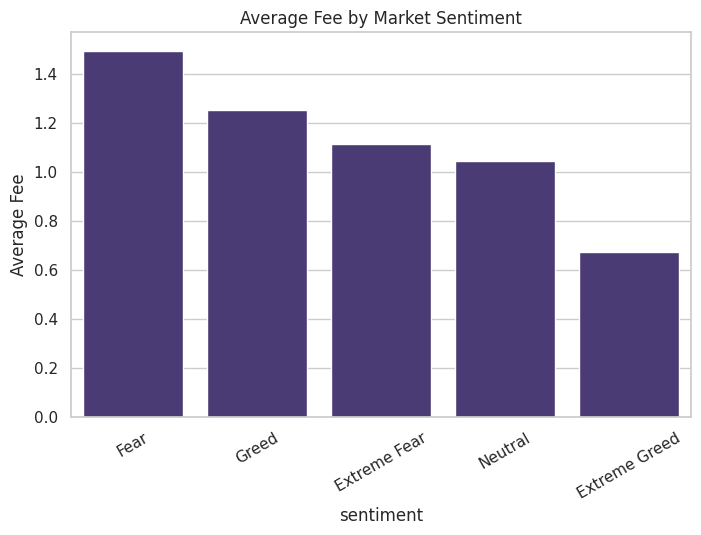

In [89]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=performance_summary, x="sentiment", y="avg_fee", order=performance_summary.sort_values("avg_fee", ascending=False)["sentiment"])
plt.title("Average Fee by Market Sentiment")
plt.ylabel("Average Fee")
plt.xticks(rotation=30)
plt.savefig("outputs/Average Fee by Market Sentiment.png", dpi=300, bbox_inches='tight')

plt.show()

In [92]:
import shutil

# Path where Colab downloaded your PDF (usually '/content/' or your Downloads folder)
downloaded_pdf_path = "/content/Notebook_1 - Colab.pdf"  # Replace with actual filename

# Destination path in your project
project_pdf_path = f"{root_dir}/ds_report.pdf"

# Copy the file (overwrites if exists)
shutil.copyfile(downloaded_pdf_path, project_pdf_path)

print(f"PDF copied to: {project_pdf_path}")

PDF copied to: ds_Palak/ds_report.pdf
